In [20]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config1 import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [51]:
# Lists to hold results

target_user = ["@CNN", "@BBC", "@CBS", "@FOXNews", "NYTimes"]

counter = 1

sentiments=[]

oldest_tweet = None

results_list = []

for user in target_user:
    
    
    for x in range(5):
    
        public_tweets = api.user_timeline(user, page=x, max_id=oldest_tweet)
        
        for tweet in public_tweets:
        
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neg = results["neg"]
            neu = results["neu"]

        # Print Tweets
#         print(f'Tip {counter}: {tweet["text"]}')
#         oldest_tweet = ['id'] - 1
        
            sentiments.append({"Source" : tweet["user"]["name"],
                               "Text" : tweet["text"],
                               "Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
            counter+=1
    counter=1

In [64]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd  

,Compound,Date,Negative,Neutral,Positive,Source,Text,Tweets Ago
0,0.7425,Sun Oct 14 04:01:05 +0000 2018,0.718,0.000,0.282,CNN,Japan now has the world's most powerful passpo...,1
1,0.2144,Sun Oct 14 03:30:11 +0000 2018,0.919,0.000,0.081,CNN,When it comes to control of the Senate after t...,2
2,0.0000,Sun Oct 14 03:00:12 +0000 2018,1.000,0.000,0.000,CNN,What's next for #MeToo after Brett Kavanaugh's...,3
3,0.3182,Sun Oct 14 02:45:04 +0000 2018,0.813,0.000,0.187,CNN,She claimed a 9-year-old boy groped her. Then ...,4
4,0.0000,Sun Oct 14 02:30:03 +0000 2018,1.000,0.000,0.000,CNN,How American pastor Andrew Brunson became a ke...,5
5,0.0000,Sun Oct 14 02:15:04 +0000 2018,1.000,0.000,0.000,CNN,"Remains of a Neanderthal child from 115,000 ye...",6
6,0.4404,Sun Oct 14 02:00:12 +0000 2018,0.879,0.000,0.121,CNN,Tony once said that traveling leads you to bel...,7
7,0.0000,Sun Oct 14 01:45:03 +0000 2018,1.000,0.000,0.000,CNN,Officer who shot Tamir Rice withdraws applicat...,8
8,0.5994,Sun Oct 14 01:30:07 +0000 2018,0.471,0.162,0.366,CNN,These are the 8 best haunted house attractions...,9
9,0.0000,Sun Oct 14 01:15:10 +0000 2018,1.000,0.000,0.000,CNN,"First lady Melania Trump says she was ""blindsi...",10


In [65]:
sentiments_pd.count() 

Compound      500
Date          500
Negative      500
Neutral       500
Positive      500
Source        500
Text          500
Tweets Ago    500
dtype: int64

In [68]:
cnn_df = sentiments_pd[sentiments_pd["Source"] =="CNN"]
bbc_df = sentiments_pd[sentiments_pd["Source"] =="BBC"]
cbs_df = sentiments_pd[sentiments_pd["Source"] =="CBS"]
fox_df = sentiments_pd[sentiments_pd["Source"] =="Fox News"]
ny_df = sentiments_pd[sentiments_pd["Source"] =="The New York Times"]

                      
cbs_df.head()                      

,Compound,Date,Negative,Neutral,Positive,Source,Text,Tweets Ago
200,0.4466,Sat Oct 13 03:09:33 +0000 2018,0.693,0.094,0.213,CBS,DVR ALERT for Viewers in EAST/CENTRAL Time Zon...,1
201,0.7579,Fri Oct 12 17:59:00 +0000 2018,0.735,0.000,0.265,CBS,This bonus spin was just a part of what made #...,2
202,0.5093,Thu Oct 11 18:05:06 +0000 2018,0.838,0.000,0.162,CBS,"RT @CBSAllAccess: Welcome to #TheTwilightZone,...",3
203,0.4939,Wed Oct 10 20:31:12 +0000 2018,0.802,0.000,0.198,CBS,Ready to get into the Halloween spirit? An enc...,4
204,-0.3400,Tue Oct 09 19:23:28 +0000 2018,0.893,0.107,0.000,CBS,@ira We may have accidentally offered the job ...,5


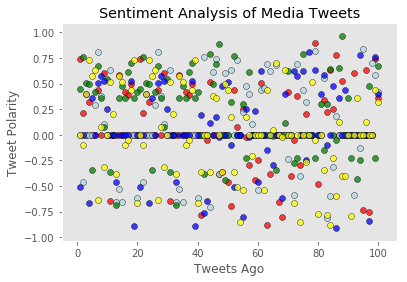

In [71]:
 plt.scatter(cnn_df["Tweets Ago"], 
            cnn_df["Compound"],
            alpha = 0.75,
            color ="red",
            edgecolor ='black')
    
plt.scatter(bbc_df["Tweets Ago"], 
            bbc_df["Compound"],
            alpha = 0.75,
            color ="lightblue",
            edgecolor ='black')

plt.scatter(cbs_df["Tweets Ago"], 
            cbs_df["Compound"],
            alpha = 0.75,
            color ="green",
            edgecolor ='black')

plt.scatter(fox_df["Tweets Ago"], 
            fox_df["Compound"],
            alpha = 0.75,
            color ="blue",
            edgecolor ='black')

plt.scatter(ny_df["Tweets Ago"], 
            ny_df["Compound"],
            alpha = 0.75,
            color ="yellow",
            edgecolor ='black')

    #add labels
plt.title("Sentiment Analysis of Media Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
# plt.grid()

plt.show()